In [1]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dense,Dropout,Activation,Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import plot_model as plot

In [2]:
max_features = 20000
maxlen = 80
batch_size = 32

In [5]:
# Prepare dataset
(X_train,y_train),(X_test,y_test) = imdb.load_data(nb_words=max_features)
X_train = sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = sequence.pad_sequences(X_test,maxlen=maxlen)

/usr/local/lib/python3.6/site-packages/keras/datasets/imdb.py:45: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


17358848/17464789 [============================>.] - ETA: 0s

In [6]:
# LSTM
model = Sequential()
model.add(Embedding(max_features,128,dropout=0.2))
model.add(LSTM(128,dropout_W=0.2,dropout_U=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`
  after removing the cwd from sys.path.


In [7]:
# Compile
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
# Training
model.fit(X_train,y_train,batch_size=batch_size,verbose=1,nb_epoch=1,validation_data=(X_test,y_test))

/usr/local/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 348s - loss: 0.4557 - acc: 0.7821 - val_loss: 0.3902 - val_acc: 0.8320


In [9]:
# Evalaution
score = model.evaluate(X_test,y_test,batch_size=batch_size)
print("Test Metrics:",list(zip(model.metrics_names,score)))
plot(model,to_file='s8.png',show_shapes=True)

25000/25000 [==============================] - 54s    
Test Metrics: [('loss', 0.39019927809715271), ('acc', 0.83204)]


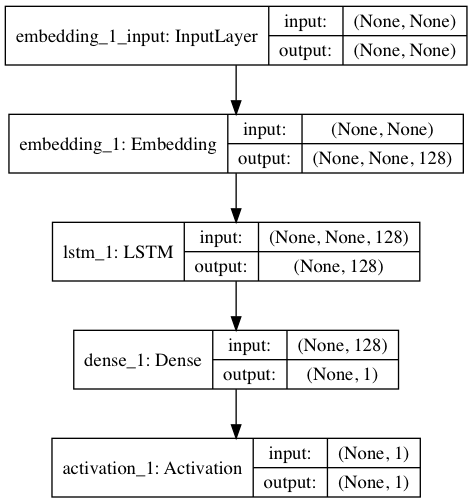

In [10]:
from IPython.display import Image
Image(filename='s8.png')